# Univariate polynomial factorization benchmark

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import os.path

from matplotlib import rcParams
rcParams['font.size'] = 12
rcParams['font.weight'] = 'normal'

In [56]:
style_colors = {
    'Rings'       : '#377eb8', 
    'Mathematica' : '#e41a1c', 
    'NTL'         : '#4daf4a', 
    'FLINT'       : '#ff7f00'
}

def plot_dep(char, ax = None, show_legend = True):
    if ax is None:
        plt.figure(figsize=(2 * 5, 2 * 2)) 
        ax = plt.gca()
    
    df = pd.read_csv('../results/factor_univariate_char_%s.tsv'%char, sep='\t')

    ax.set_yscale('log')
    for tool in ['Rings', 'NTL', 'FLINT', 'Mathematica']:        
        ax.plot(df['Degree'], df[tool], label = tool, lw = 2, c = style_colors[tool], marker = '.', alpha = 0.8)
    
    ax.set_xlabel('degree')
    ax.set_ylabel('time, s')
    
    if show_legend:
        ax.legend(loc = 4)

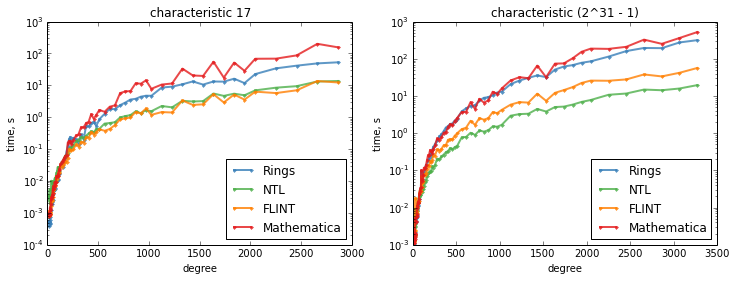

In [57]:
f, (l, r) = plt.subplots(nrows=1, ncols = 2, figsize=(2*3*2, 2*2))

plot_dep(17, ax = l, show_legend=True)
l.set_title('characteristic 17')

plot_dep(pow(2, 31) - 1, ax = r, show_legend=True)
r.set_title('characteristic (2^31 - 1)')

plt.savefig('factor_univar.pdf', bbox_inches='tight')